In [1]:
# libraries

using LinearAlgebra
using Random
using StatsBase
using Statistics
using Distributions
using Plots

# 6.4. Poisson regression

Let $b_i\in\mathbb{N}$ be counts as coming from a distribution $p(b|a, x) = \exp(-e^{\langle a, x\rangle})\exp(b\langle a, x\rangle)/b!$, giving loss $f(x;(a,b) = \exp(\langle a, x\rangle) - b\langle a, x\rangle$. We generate the data by first drawing $u\sim\sqrt{n}\cdot\text{Uni}(\mathbb{S}^{n-1})$, then drawing $a_i\overset{\text{iid}}{\sim}N(0, (1/n)I_n)$ and $b_i\sim\text{Poisson}(e^{\langle a_i, u\rangle})$.

In [2]:
# sample generation

function matrix_gen(
    m  :: Int,
    n  :: Int
    )
    # generate b_i ~ p(b|a, x) = exp( - exp(a'x))exp(b * a'x) / b!

    u_opt = randn(n)
    u_opt = (u_opt/norm(u_opt)) * sqrt(n)

    A = Matrix(undef, m, n)
    
    b = zeros(m)
    
    for i = 1:m
        
        A[i,:] = rand(Distributions.MvNormal(zeros(n), 1/n * ones(n)))
        
        b[i] = rand(Distributions.Poisson(exp(A[i,:]'u_opt)))
        
    end
    
    return A, b, u_opt
    
end

matrix_gen (generic function with 1 method)

In [3]:
# Generate data, define the objective function, and set parameters

Random.seed!(304)

X, y, x = matrix_gen(1000, 40)

m, n = size(X)

# the objective function
function F(θ)
    Xθ = X*θ
    sum(exp.(Xθ) .- (y .* (Xθ))) / m
end

# optimal value
Fstar = F(x)

# parameter setting
T = 100 # # of experiments
K = 1e3 # total iterations
γinits = exp.(collect(range(log(10^(-2)), log(10^5), length = 15)))
ϵ = 0.05 # tolerance
ϵ_bisection = 1e-03
β = 0.6 # exponent of step size

0.6

In [4]:
# experiments for SGM (Figure 7)

# initialization
iterations_SGM = zeros(T, 15)

# main iteration
for i = 1:15
    for j = 1:T
        γinit = γinits[i]
        θ = 2 * ones(n)
        for k = 1:K
            idx = sample(1:m) # sampling
            γ = γinit * k^(-β) # update stepsize
            
            # SGM update
            θ += (γ * (y[idx] - exp(X[idx,:]'θ))) * X[idx,:]
            
            if (abs(F(θ) - Fstar) <= ϵ || k >= K)
                #println(F(θ))
                iterations_SGM[j, i] = k
                break
            end                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
        end
    end
end

In [5]:
sgm_iters = [[quantile(iterations_SGM[:,i], 0.05) for i = 1:15] median(iterations_SGM, dims = 1)' [quantile(iterations_SGM[:,i], 0.95) for i = 1:15]]

15×3 Array{Float64,2}:
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
  121.7    408.5   883.3 
    4.95    66.0   236.3 
    4.0     79.0   244.55
  118.8    233.5   552.35
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 

In [6]:
# experiments for the truncated model (Figure 7)

# initialization
iterations_truncated = zeros(T, 15)

# main iteration
for i = 1:15
    for j = 1:T
        γinit = γinits[i]
        θ = 2 * ones(n)
        for k = 1:K
            idx = sample(1:m) # sampling
            γ = γinit * k^(-β) # update stepsize
            
            # Update for the truncated model
            Xθ = X[idx,:]'θ
            f = exp(Xθ) - y[idx] * Xθ
            ∇f = (exp(Xθ) - y[idx]) * X[idx,:]
            θ = θ -  min(γ, f/norm(∇f)^2)*∇f
            
            if (abs(F(θ) - Fstar) <= ϵ || k >= K)
                #println(F(θ))
                iterations_truncated[j, i] = k
                break
            end
        end
    end
end

In [7]:
trunc_iters = [[quantile(iterations_truncated[:,i], 0.05) for i = 1:15] median(iterations_truncated, dims = 1)' [quantile(iterations_truncated[:,i], 0.95) for i = 1:15]]

15×3 Array{Float64,2}:
  277.55  1000.0  1000.0 
  225.75  1000.0  1000.0 
  232.85  1000.0  1000.0 
  154.2   1000.0  1000.0 
  300.3    691.0  1000.0 
   62.0    262.5   598.55
    5.9     53.5   153.35
    2.95    33.5   170.0 
   30.6     97.5   204.8 
  163.45   274.5   917.35
    1.0    951.5  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 

In [8]:
# experiments for the proximal model (Figure 7)

function f(x, xk, a, b, α)
    return log(1 + exp(-b * (a'x))) + norm(x - xk)^2 / 2 / α
end

# initialization
iterations_proximal = zeros(T, 15)

# main iteration
for i = 1:15
    for j = 1:T
        println("start i = ", i, " and j = ", j)
        γinit = γinits[i]
        θ = 2 * ones(n)
        for k = 1:K
            idx = sample(1:m) # sampling
            γ = γinit * k^(-β) # update stepsize
            
            # Update for the proximal model
            Δx = (γ * (y[idx] - exp(X[idx,:]'θ))) * X[idx,:]
            
            searchs = [f(θ + l/1000 * Δx, θ, X[idx,:], y[idx], γ) for l = 1:1000]
            
            θ = θ + (findmin(searchs)[2])/1000 * Δx
            
            if (abs(F(θ) - Fstar) <= ϵ || k >= K)
                println(abs(F(θ) - Fstar))
                #println(F(θ))
                iterations_proximal[j, i] = k
                break
            end
        end
    end
end

start i = 1 and j = 1
0.058409816935785064
start i = 1 and j = 2
0.058411086351705666
start i = 1 and j = 3
0.058405307510540294
start i = 1 and j = 4
0.05840175201605258
start i = 1 and j = 5
0.058402560605710696
start i = 1 and j = 6
0.05841577908991813
start i = 1 and j = 7
0.058407163407269924
start i = 1 and j = 8
0.0584035445107981
start i = 1 and j = 9
0.05840569422508246
start i = 1 and j = 10
0.058408197618218805
start i = 1 and j = 11
0.05841142490804774
start i = 1 and j = 12
0.058408288248727236
start i = 1 and j = 13
0.058403774227247074
start i = 1 and j = 14
0.0584101247113632
start i = 1 and j = 15
0.058405721478836825
start i = 1 and j = 16
0.058405220291211646
start i = 1 and j = 17
0.05840834012033358
start i = 1 and j = 18
0.05840954257542352
start i = 1 and j = 19
0.05840273524660489
start i = 1 and j = 20
0.05840924436137229
start i = 1 and j = 21
0.05840158843283183
start i = 1 and j = 22
0.0583998840618537
start i = 1 and j = 23
0.0584127068464787
start i = 1 an

0.058345740670162294
start i = 2 and j = 92
0.05836109903803177
start i = 2 and j = 93
0.05836552435314768
start i = 2 and j = 94
0.058361015521377735
start i = 2 and j = 95
0.05834656577955866
start i = 2 and j = 96
0.05839037026063687
start i = 2 and j = 97
0.05836901587502841
start i = 2 and j = 98
0.058384119222319675
start i = 2 and j = 99
0.05835215499313351
start i = 2 and j = 100
0.058348762209032956
start i = 3 and j = 1
0.05820075542828007
start i = 3 and j = 2
0.058235987004819134
start i = 3 and j = 3
0.05823631155016595
start i = 3 and j = 4
0.058259481250150125
start i = 3 and j = 5
0.058148140471645626
start i = 3 and j = 6
0.058238440885363896
start i = 3 and j = 7
0.05824572444953502
start i = 3 and j = 8
0.05820695980053625
start i = 3 and j = 9
0.05819623505353666
start i = 3 and j = 10
0.05819968195261549
start i = 3 and j = 11
0.058207856122177604
start i = 3 and j = 12
0.05818485906523507
start i = 3 and j = 13
0.05828830273381602
start i = 3 and j = 14
0.05824446

0.05794628889778186
start i = 4 and j = 82
0.05786766002486632
start i = 4 and j = 83
0.057844253388101285
start i = 4 and j = 84
0.05781314784904057
start i = 4 and j = 85
0.057971475843131004
start i = 4 and j = 86
0.05757755393354891
start i = 4 and j = 87
0.05787810051859432
start i = 4 and j = 88
0.057567659069534094
start i = 4 and j = 89
0.0577126642705198
start i = 4 and j = 90
0.05768971723269389
start i = 4 and j = 91
0.057740887506495864
start i = 4 and j = 92
0.05767823020446439
start i = 4 and j = 93
0.05791197689675254
start i = 4 and j = 94
0.057773563300654085
start i = 4 and j = 95
0.057809286825197925
start i = 4 and j = 96
0.057850128558003644
start i = 4 and j = 97
0.05771993695119704
start i = 4 and j = 98
0.05797719367212195
start i = 4 and j = 99
0.05775526662068786
start i = 4 and j = 100
0.057820013457236974
start i = 5 and j = 1
0.056425730889053116
start i = 5 and j = 2
0.0562527512653036
start i = 5 and j = 3
0.05568939623465308
start i = 5 and j = 4
0.05689

0.05279732113212454
start i = 6 and j = 73
0.052778130328501205
start i = 6 and j = 74
0.05346831546406705
start i = 6 and j = 75
0.05160995660116041
start i = 6 and j = 76
0.050578908509667175
start i = 6 and j = 77
0.05437339878904324
start i = 6 and j = 78
0.05077414933269642
start i = 6 and j = 79
0.05281409026119943
start i = 6 and j = 80
0.051816122324269354
start i = 6 and j = 81
0.052367307989811374
start i = 6 and j = 82
0.05314940659014711
start i = 6 and j = 83
0.052123872488173295
start i = 6 and j = 84
0.05192201116494688
start i = 6 and j = 85
0.050900630441751527
start i = 6 and j = 86
0.05096300620425154
start i = 6 and j = 87
0.053303054402838446
start i = 6 and j = 88
0.05219870276628302
start i = 6 and j = 89
0.05323785943637527
start i = 6 and j = 90
0.05087317620171039
start i = 6 and j = 91
0.052708989046429955
start i = 6 and j = 92
0.0540856134095663
start i = 6 and j = 93
0.05188908620269739
start i = 6 and j = 94
0.05107603331523858
start i = 6 and j = 95
0.05

0.04983032578396418
start i = 8 and j = 64
0.04986677999034106
start i = 8 and j = 65
0.04978274740164024
start i = 8 and j = 66
0.049890091823669214
start i = 8 and j = 67
0.049797126849174034
start i = 8 and j = 68
0.045406676684564995
start i = 8 and j = 69
0.04795039338184626
start i = 8 and j = 70
0.04994420834411473
start i = 8 and j = 71
0.0481954869004132
start i = 8 and j = 72
0.04999575927922295
start i = 8 and j = 73
0.04903196993452441
start i = 8 and j = 74
0.04876059724173609
start i = 8 and j = 75
0.049289575965468235
start i = 8 and j = 76
0.04976132174110848
start i = 8 and j = 77
0.04840035413745147
start i = 8 and j = 78
0.04984933011786674
start i = 8 and j = 79
0.04843789842033075
start i = 8 and j = 80
0.049765765742352586
start i = 8 and j = 81
0.043689657710724084
start i = 8 and j = 82
0.0494684714077932
start i = 8 and j = 83
0.04982214597331047
start i = 8 and j = 84
0.04764471189553843
start i = 8 and j = 85
0.0490605422942888
start i = 8 and j = 86
0.048405

0.04856372653545826
start i = 10 and j = 53
0.04686886686615421
start i = 10 and j = 54
0.04989126568135116
start i = 10 and j = 55
0.04991910492761209
start i = 10 and j = 56
0.04984227583841638
start i = 10 and j = 57
0.047920054812164214
start i = 10 and j = 58
0.04860430817285988
start i = 10 and j = 59
0.04751041033738124
start i = 10 and j = 60
0.04825895641021838
start i = 10 and j = 61
0.04806864385518261
start i = 10 and j = 62
0.04851857508375168
start i = 10 and j = 63
0.0475175288327111
start i = 10 and j = 64
0.04972094268470484
start i = 10 and j = 65
0.04849518640256101
start i = 10 and j = 66
0.049978066976896884
start i = 10 and j = 67
0.04992798397230913
start i = 10 and j = 68
0.04661403547463816
start i = 10 and j = 69
0.04996649535267672
start i = 10 and j = 70
0.04766010318530378
start i = 10 and j = 71
0.04942773365399267
start i = 10 and j = 72
0.04834046670618897
start i = 10 and j = 73
0.048068365227770804
start i = 10 and j = 74
0.04960212021578159
start i = 

0.0652505574525929
start i = 12 and j = 39
0.14621855768081715
start i = 12 and j = 40
0.12126933509307614
start i = 12 and j = 41
0.10701816875224746
start i = 12 and j = 42
0.14065878934823373
start i = 12 and j = 43
0.11586261855126201
start i = 12 and j = 44
0.1356189218641587
start i = 12 and j = 45
0.10420727059729862
start i = 12 and j = 46
0.16133491945006406
start i = 12 and j = 47
0.12709128302155503
start i = 12 and j = 48
0.21035311739343687
start i = 12 and j = 49
0.09969797673915737
start i = 12 and j = 50
0.04812791637181324
start i = 12 and j = 51
0.11241227307731017
start i = 12 and j = 52
0.17762369225974284
start i = 12 and j = 53
0.12348498410536723
start i = 12 and j = 54
0.12628251017926784
start i = 12 and j = 55
0.1470711313878731
start i = 12 and j = 56
0.14974279235035304
start i = 12 and j = 57
0.23093508959601727
start i = 12 and j = 58
0.15407728066264637
start i = 12 and j = 59
0.17407290561675748
start i = 12 and j = 60
0.11821708518025076
start i = 12 an

NaN
start i = 14 and j = 29
NaN
start i = 14 and j = 30
2.0183166348450143
start i = 14 and j = 31
1.256652486689387
start i = 14 and j = 32
NaN
start i = 14 and j = 33
1.5899705063628056
start i = 14 and j = 34
1.7522065065935508
start i = 14 and j = 35
1.3494919941614612
start i = 14 and j = 36
1.4474189862952316
start i = 14 and j = 37
1.5130160490311102
start i = 14 and j = 38
1.0412835530865334
start i = 14 and j = 39
0.8881354133148226
start i = 14 and j = 40
1.595342512766155
start i = 14 and j = 41
1.5940323715943974
start i = 14 and j = 42
2.5347573066972577
start i = 14 and j = 43
1.5212603356678769
start i = 14 and j = 44
1.7592500694665767
start i = 14 and j = 45
1.369143119973287
start i = 14 and j = 46
1.4451535946662522
start i = 14 and j = 47
1.4541077104128806
start i = 14 and j = 48
2.0428901784838525
start i = 14 and j = 49
1.8696881938353447
start i = 14 and j = 50
1.5552970967682773
start i = 14 and j = 51
1.449414423959655
start i = 14 and j = 52
1.705547336966154

In [9]:
prox_iters = [[quantile(iterations_proximal[:,i], 0.05) for i = 1:15] median(iterations_proximal, dims = 1)' [quantile(iterations_proximal[:,i], 0.95) for i = 1:15]]

15×3 Array{Float64,2}:
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
   43.85   234.5   685.2 
   11.85    72.0   216.55
    4.0     65.0   236.2 
   21.55   214.0   426.2 
  364.9    684.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 

In [10]:
# experiments for the bundle model (Figure 7)

# initialization
iterations_bundle = zeros(T, 15)

# main iteration
for i = 1:15
    for j = 1:T
        γinit = γinits[i]
        θ = 2 * ones(n)
        for k = 1:K
            idx = sample(1:m) # sampling
            γ = γinit * k^(-β) # update stepsize
            
            # Update for the bundle model
            Xθ = X[idx,:]'θ
            fθ = exp(Xθ) - y[idx] * Xθ
            ∇fθ = (exp(Xθ) - y[idx]) * X[idx,:]
            θy = θ - γ*∇fθ
            
            Xθy = X[idx,:]'θy
            fθy = exp(Xθy) - y[idx] * Xθy
            ∇fθy = (exp(Xθy) - y[idx]) * X[idx,:]
            θ̄ = θ - γ*∇fθy
            if fθ + ∇fθ'*(θ̄-θ) <= fθy + ∇fθy'*(θ̄-θy)
                θ = θ̄
            else
                λ = (fθy-fθ+γ*norm(∇fθ)^2)/(γ*norm(∇fθy-∇fθ)^2)
                θ -= γ*( (1-λ)*∇fθ + λ*∇fθy  )
            end
            
            if (abs(F(θ) - Fstar) <= ϵ || k >= K)
                #println(F(θ))
                iterations_bundle[j, i] = k
                break
            end
        end
    end
end

In [11]:
bund_iters = [[quantile(iterations_bundle[:,i], 0.05) for i = 1:15] median(iterations_bundle, dims = 1)' [quantile(iterations_bundle[:,i], 0.95) for i = 1:15]]

15×3 Array{Float64,2}:
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
  193.7    427.5   789.05
    7.9     56.0   166.75
    4.95    31.0   148.2 
   11.85   120.5   270.0 
    2.0    336.0   583.95
    2.0    835.5  1000.0 
  950.15  1000.0  1000.0 
    2.95  1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 

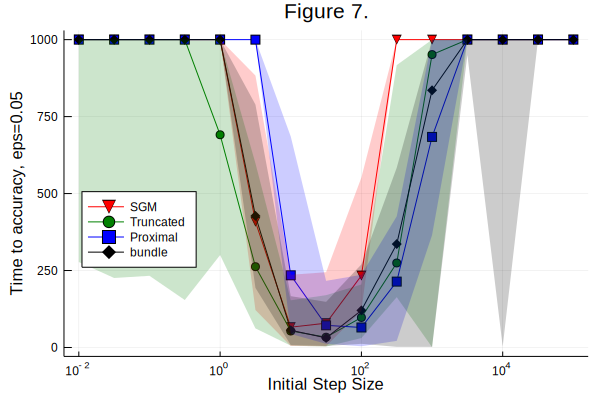

In [12]:
plt = plot(γinits, [sgm_iters[:,2] trunc_iters[:, 2] prox_iters[:, 2] bund_iters[:, 2]], 
    legend = :left,
    xscale = :log10,
    xlab = "Initial Step Size",
    ylab = "Time to accuracy, eps=0.05",
    title = "Figure 7.",
    label = ["SGM" "Truncated" "Proximal" "bundle"],
    color = [:red :green :blue :black],
    markershape = [:dtriangle :circle :square :diamond])
a = Shape([γinits; γinits],
    [sgm_iters[:,1]; sgm_iters[:,3]])
plot!(a, fillalpha = 0.2, linecolor = nothing, fillcolor = :red, label = "")
b = Shape([γinits; γinits[end:-1:1]],
    [trunc_iters[:,1]; trunc_iters[end:-1:1,3]])
plot!(b, fillalpha = 0.2, linecolor = nothing, fillcolor = :green, label = "")
c = Shape([γinits; γinits[end:-1:2]],
    [prox_iters[:,1]; prox_iters[end:-1:2,3]])
plot!(c, fillalpha = 0.2, linecolor = nothing, fillcolor = :blue, label = "")
d = Shape([γinits; γinits[end-1:-1:2]],
    [bund_iters[:,1]; bund_iters[end-1:-1:2,3]])
plot!(d, fillalpha = 0.2, linecolor = nothing, fillcolor = :black, label = "")